In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import module.conf as conf
import sklearn.metrics  as metrics

# matplotlib.use("QtCairo")
# %matplotlib tk

### Implement

1. Sigmoid: $y = f(x) = {1\over 1 + e^{-x}}$

In [3]:
def sigmoid(s: float) -> np.ndarray:
    return 1/(1 + np.exp(-s))

2. Gradient of Sigmoid: 
- $z_i = f(w^Tx_i+b_i) = sigmoid(w^Tx_i+b_i)$
- $P(y|X;w,b) = \prod\limits_{i=1}^{N}P(y_i | x_i; w, b) = \prod\limits_{i=1}^{N}z_{i}^{y_i}(1-z_{i})^{1-y_i}$
- $J(w,b) = -logP(y|X;w,b) = - \sum\limits_{i=1}^{N}(y_ilogz_i + (1-y_i)log(1-z_i))$
- $ w_i = w_{i-1} - \eta (z_i - y_i) x_i $

In [4]:
def logistic_regression_sigmoid(Y: np.ndarray, w_init: np.ndarray, b_init: float, X: np.ndarray, eta, stop_threshold: float = 1e-10, loop_count: int=10_000) -> tuple[list, list]:
    # TODO: apply for first feature
    w: list = [w_init[0]]
    b: list = [b_init]
    c = 0
    dim_X = X.shape[1]
    N = X.shape[0]
    # ONE = np.ones(shape=(dim_X, 1))
    check_w_after = 20
    while c < loop_count:
        # mix data
        mixed_index = np.random.permutation(N)
        # print(f"c:{c}\nmidex:{mixed_index}")
        # mixed_index = range(N)
        for i in mixed_index:
            # xi = X[i].transpose()
            # TODO: apply for first feature
            xi = X[i, 0]
            yi = Y[i]
            w_latest = w[-1]
            b_latest = b[-1]
            zi = sigmoid(np.add(np.dot(w_latest, xi), b_latest))
            # w_new = w[-1] - eta * (yi - zi) * xi
            # b_new = b[-1] - eta * (yi - zi)
            w_new = np.subtract(w[-1], np.dot(eta, np.dot(np.subtract(zi, yi), xi)))
            b_new = np.subtract(b[-1], np.dot(eta, np.subtract(zi, yi)))
            # w_new = np.add(w[-1], np.dot(eta, np.dot(np.subtract(yi, zi), xi)))
            # b_new = np.add(b[-1], np.dot(eta, np.subtract(yi, zi)))
            print(f"c[{c}]\n - w_latest:{w_latest}\n - w_new is:{w_new}")
            c += 1
            # if np.linalg.norm((w_new + b_new) - (w[-1] + b[-1])) < stop_threshold:
            # if np.linalg.norm((w_new) - (w[-1])) < stop_threshold:
            if (c % check_w_after == 0) and (np.linalg.norm(w_new - w[-check_w_after]) < stop_threshold):
                print(f"return when c:{c} norm:{np.linalg.norm(w_new - w[-check_w_after])}\nw:{w}\nb{b}")
                return w, b
            w.append(w_new)
            b.append(b_new)
            pass
        pass
    return w, b

### Create data

In [5]:
X = []
Y = []
N = 500
dimension = 10
# for i in range(N//2):
#     X.append(np.random.uniform(low=0, high=4.5, size=dimension))
#     Y.append(0)
#     pass
# for i in range(N - N//2):
#     X.append(np.random.uniform(low=5.5, high=10, size=dimension))
#     Y.append(1)
#     pass
# X = np.asarray(X)
# Y = np.asarray(Y)
# w_init = np.random.randn(1, dimension)
# b_init: float = np.random.rand(1)
# max_0 = X[:, 0].max()
# w_init = X[np.any(X == max_0, axis=1)][-1]
# b_init = np.ceil(max_0)
# print(f"w:{w_init}\nb:{b_init}")
# np.save(file=conf.PROJECT_DIR + "/data/ml/X", arr=X)
# np.save(file=conf.PROJECT_DIR + "/data/ml/Y", arr=Y)
# np.save(file=conf.PROJECT_DIR + "/data/ml/w_init", arr=w_init)
# np.save(file="".join((conf.PROJECT_DIR, "/data/ml/b_init",)), arr=b_init)
X: np.ndarray = np.load(file="".join((conf.PROJECT_DIR, "/data/ml/X.npy",)))
Y: np.ndarray = np.load(file="".join((conf.PROJECT_DIR, "/data/ml/Y.npy",)))
# w_init: np.ndarray = np.load(file="".join((conf.PROJECT_DIR, "/data/ml/w_init.npy",)))
# b_init: np.ndarray = np.load(file="".join((conf.PROJECT_DIR, "/data/ml/b_init.npy",)))
w_init = np.random.randn(dimension)
b_init = np.random.randn()
# print(f"X:{X}\nY:{Y}")
print(f"w_init:{w_init}\nb_init:{(b_init)}")

# eta = .003
# column matrix w_init
# w_list, b_list = logistic_regression_sigmoid(Y=Y, w_init=w_init, b_init=b_init, X=X, eta=eta, loop_count=30_000)
eta = 1.0
w_list, b_list = logistic_regression_sigmoid(Y=Y, w_init=w_init, b_init=b_init, X=X, eta=eta, loop_count=1_000)

print(f"w_list[-1]:{w_list[-1]}\nb_list[-1]:{b_list[-1]}")

w_init:[ 0.4585137   0.86171291  0.60709973  2.10689663 -1.51102266  0.94832416
  0.9846297  -0.74568462  0.28859166 -0.25829254]
b_init:0.8835747574077416
c[0]
 - w_latest:0.4585136971174494
 - w_new is:0.6217306259455305
c[1]
 - w_latest:0.6217306259455305
 - w_new is:0.6449206244090531
c[2]
 - w_latest:0.6449206244090531
 - w_new is:0.6564996780609985
c[3]
 - w_latest:0.6564996780609985
 - w_new is:0.7083259851677556
c[4]
 - w_latest:0.7083259851677556
 - w_new is:0.713483018084564
c[5]
 - w_latest:0.713483018084564
 - w_new is:-1.4238067353104409
c[6]
 - w_latest:-1.4238067353104409
 - w_new is:-1.4675314418692327
c[7]
 - w_latest:-1.4675314418692327
 - w_new is:7.7663112657106295
c[8]
 - w_latest:7.7663112657106295
 - w_new is:6.662012628806946
c[9]
 - w_latest:6.662012628806946
 - w_new is:6.662012628806946
c[10]
 - w_latest:6.662012628806946
 - w_new is:2.3204404201497617
c[11]
 - w_latest:2.3204404201497617
 - w_new is:1.6517230241664604
c[12]
 - w_latest:1.6517230241664604
 - 

### Test

In [6]:
# sigmoid(np.dot(w_list[-1], X[0,0]) + b_list[-1])
# sigmoid(np.add(np.dot(w_list[-1], X[0]), b_list[-1]))
# sigmoid(np.dot(w_list[-1], X[0]))
# sigmoid(np.add(np.dot(w_list[-1], X[:, 0]), b_list[-1]))
# metrics.f1_score(y_true=Y, y_pred=sigmoid(np.add(np.dot(w_list[-1], X[:, 0]), b_list[-1])))
S: np.ndarray = sigmoid(np.add(np.dot(w_list[-1], X[:, 0]), b_list[-1]))
# print(f"S:{S}")
# MAE
print(f"MAE:{metrics.mean_absolute_error(y_true=Y, y_pred=S)}")
print(f"APS:{metrics.average_precision_score(y_true=Y, y_score=S)}")
# print(f"CLR:{metrics.class_likelihood_ratios(y_true=Y, y_pred=np.round(S))}")
# Accurary Score:
print(f"Accuracy:{metrics.accuracy_score(y_true=Y.astype(dtype=float), y_pred=np.round(a=S, decimals=0), normalize=True)}")
# F1 Score
print(f"F1 score:{metrics.f1_score(y_true=Y.astype(dtype=float), y_pred=np.round(S))}")

MAE:0.005257255989318782
APS:1.0
Accuracy:1.0
F1 score:1.0


### Plotting

b:-37.78680193164356 w:7.138421704136911 -b/w:5.293439292013958


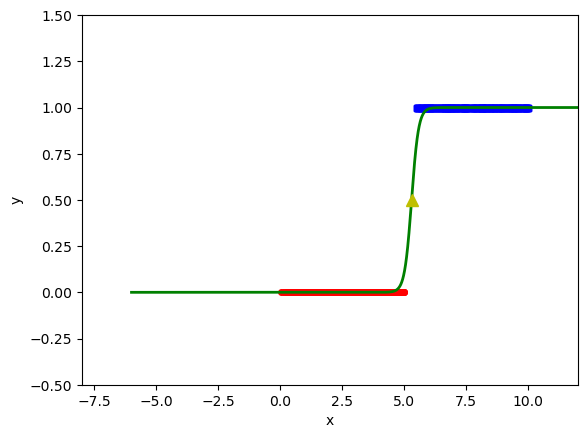

In [7]:
# dth = 0
X0 = X[np.where(Y == 0)]
Y0 = Y[np.where(Y == 0)]
X1 = X[np.where(Y == 1)]
Y1 = Y[np.where(Y == 1)]

xx = np.linspace(-6, 16, 10_000)
b = b_list[-1]
w = w_list[-1]
print(f"b:{b} w:{w} -b/w:{-b/w}")
threshold = -b/w

yy = sigmoid(np.add(b, np.dot(w, xx)))

fig, axe = plt.subplots()
axe.plot(X0[:, 0], Y0, "ro", markersize=4)
axe.plot(X1[:, 0], Y1, "bs", markersize=4)

axe.axis([-8, 12, -0.5, 1.5])
axe.plot(xx, yy, 'g-', linewidth = 2)
axe.plot(threshold, .5, 'y^', markersize = 8)
# axe.xlabel('studying hours')
# axe.ylabel('predicted probability of pass')
axe.set_xlabel("x")
axe.set_ylabel('y')
plt.show()

### Test matrix

In [94]:
x = np.array(object=[1, 2, 3], dtype=float)
y = np.array(object=[4], dtype=float)

print(f"x*y = {x*y}")
# print(f"x dot y = {np.dot(a=x, b=y)}")
print(f"x - 2 = {x-2}")

x*y = [ 4.  8. 12.]
x - 2 = [-1.  0.  1.]
